In [1]:
import torchvision
import torch
import torch.nn as nn

In [2]:
input_sample = torch.randn(1, 3, 224, 224)

In [4]:
model = torchvision.models.vgg16()
print(f"million of params: {sum([p.numel() for p in model.parameters() if p.requires_grad]) / 1000 / 1000:.2f}")
model = torch.nn.Sequential(*list(model.children())[:-1])
print(f"last layer shape:{model(input_sample).shape}")

million of params: 138.36
last layer shape:torch.Size([1, 512, 7, 7])


In [21]:
model = torchvision.models.vgg19()
print(f"million of params: {sum([p.numel() for p in model.parameters() if p.requires_grad]) / 1000 / 1000:.2f}")
model = torch.nn.Sequential(*list(model.children())[:-1])
print(f"last layer shape:{model(input_sample).shape}")

million of params: 143.67
last layer shape:torch.Size([1, 512, 7, 7])


In [9]:
model = torchvision.models.resnet50()
print(f"million of params: {sum([p.numel() for p in model.parameters() if p.requires_grad]) / 1000 / 1000:.2f}")
model = torch.nn.Sequential(*list(model.children())[:-2])
print(f"last layer shape:{model(input_sample).shape}")

million of params: 25.56
last layer shape:torch.Size([1, 2048, 7, 7])


In [8]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [10]:
model = torchvision.models.resnet152(weights = "DEFAULT")
print(f"million of params: {sum([p.numel() for p in model.parameters() if p.requires_grad]) / 1000 / 1000:.2f}")
model = torch.nn.Sequential(*list(model.children())[:-2])
print(f"last layer shape:{model(input_sample).shape}")

million of params: 60.19
last layer shape:torch.Size([1, 2048, 7, 7])


In [1]:
# add path to scripts folder
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch
import sys
import os
sys.path.append("../scripts")

import data 
import models

In [2]:
filenames = os.listdir("../data/output/patches")
filenames = [os.path.join("../data/output/patches", f) for f in filenames]
dataset = data.get_sample_patches_dataset(filenames=filenames)

In [3]:
dl = DataLoader(dataset, batch_size=32, shuffle=False)
model = models.DEC(
        latent_dim=1024,
        encoder_arch="resnet152",
        n_clusters=10,
        alpha=1,
        pretrain_epochs=100,
        train_epochs=100,
        plot_results=True,
        results_dir="DEC_resnet152_results",
        device="cuda",
)
model.to("cuda");

/home/giovani/miniconda3/envs/urban_gdp2/lib/python3.9/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [4]:
model.get_centers(dl)

/home/giovani/miniconda3/envs/urban_gdp2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [5]:
embeddings, labels ,_ = model.get_embeddings_labels(dl)

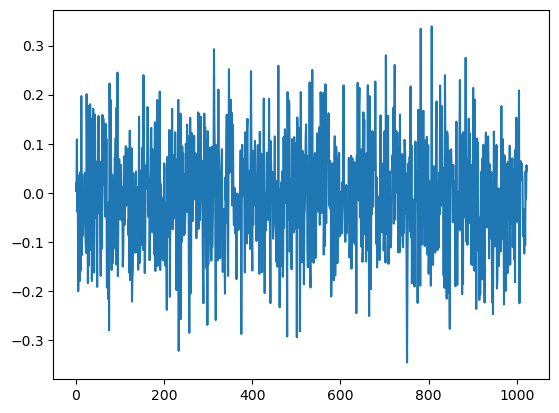

In [12]:
plt.plot(embeddings[0] - embeddings[1])

In [4]:
model.get_centers(dl)
model.load_state_dict(torch.load("../models/DEC_resnet152_results/DEC_resnet152.pth"))

/home/giovani/miniconda3/envs/urban_gdp2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<All keys matched successfully>

In [4]:
def plot_first_image(loader):
    for x, _ in loader:
        img = x[0].cpu().numpy()
        print(img.shape)
        print(img.min(), img.max())
        # scale to [0, 1]
        img = (img - img.min()) / (img.max() - img.min())
        plt.imshow(img.transpose(1, 2, 0))
        plt.show()
        break

(3, 224, 224)
-1.5014129 2.0996952


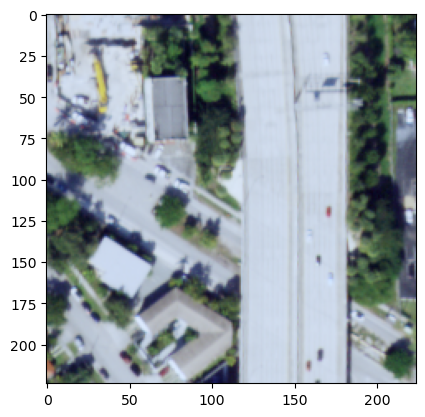

In [5]:
plot_first_image(dl)

In [6]:
for batch, _ in dl:
    batch = batch.to("cuda")
    encoded, decoded = model.CAE(batch)
    break

In [11]:
def plot_first_image_batch(batch, i = 0):
    img = batch[i].cpu().detach().numpy()
    print(img.shape)
    print(img.min(), img.max())
    #img = np.mean(img, axis=0)
    img = img.transpose(1, 2, 0)
    img = (img - img.min()) / (img.max() - img.min())

    plt.imshow(img)
    plt.show()

(3, 224, 224)
0.011433814 0.04119359


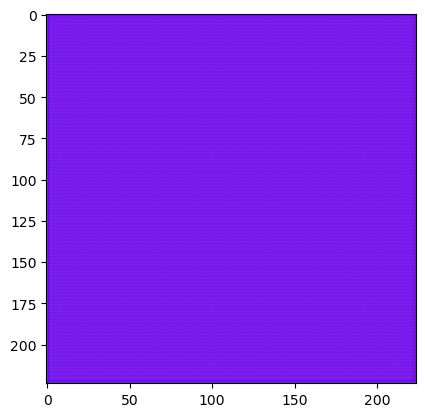

In [12]:
for i in range(20):
    plot_first_image_batch(decoded, i)
    break

In [2]:
new_model = models.Decoder(512)

In [3]:
random_sample = torch.randn(1, 128, 7, 7)

In [19]:
random_sample[:, :, :6, :6] = 0

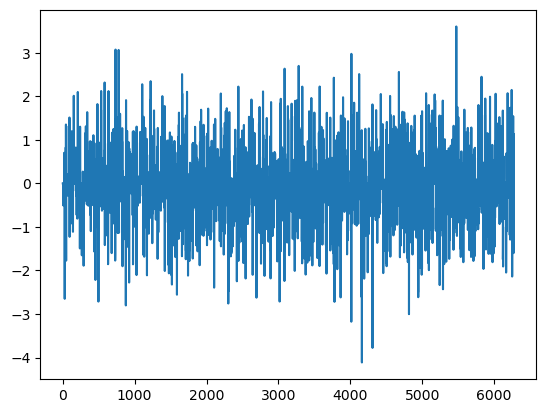

In [20]:
plt.plot(random_sample.numpy().reshape(-1));

In [21]:
def plot_decoded_output(model, sample):
    decoded = model(sample)
    decoded = decoded.cpu().detach().numpy()
    decoded = decoded.transpose(0, 2, 3, 1)
    decoded = (decoded - decoded.min()) / (decoded.max() - decoded.min())
    print(decoded[0].mean())
    plt.imshow(np.mean(decoded[0], axis=2))
    plt.show()

0.4445187


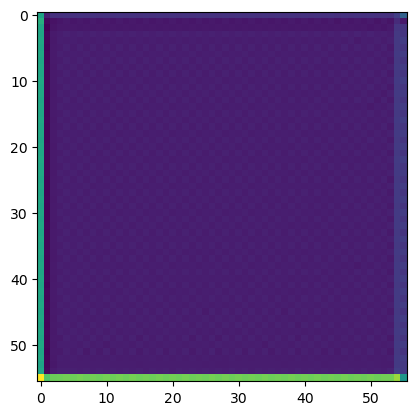

In [22]:
plot_decoded_output(new_model, random_sample)